# 1) Introduction to Ranking Window Functions

In this lesson, we'll learn about ranking window functions and how to use them in SQL. Ranking functions are nondeterministic functions gathered under the window functions umbrella and designed to solve complicated problems quickly.

For example, ranking window functions enable us to answer which observation is **best, second best, or worst**, which is hard to implement this kind of queries with conventional SQL queries.

In this lesson, we're going to learn the following four ranking functions:

* `ROW_NUMBER()`

* `RANK()`

* `DENSE_RANK()`

* `NTILE()`

The first three functions assign a sequential number to each row in a query’s result set.

The last function creates a specified number of buckets (or groups) and gives each row in a query’s result set to one of these buckets according to their rank, starting with one and continuing to the number of buckets specified.

This lesson will discuss these ranking functions in detail. After we finish this lesson, we'll have a good understanding of

* How to use the ranking window functions to create a basis for solving analytics problems.

* The difference between the `ROW_NUMBER()`, `RANK()`, and `DENSE_RANK()` functions.

* How to define a specified number of buckets with the `NTILE()` function to solve particular analytical problems.

# 2) Ranking Functions and Supported Windowing Elements

let’s review which windowing elements are mandatory or optional when calling the ranking functions

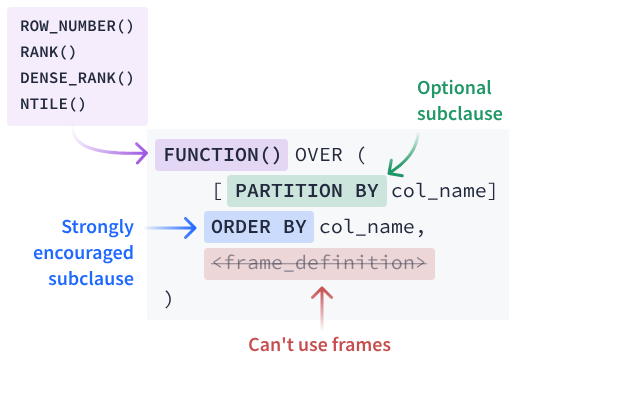

In general, all four ranking functions support the following:

* An optional `PARTITION BY` subclause. The query's result set is considered a single partition if we don't specify a window partition clause.

* An `ORDER BY` subclause, which is not mandatory but strongly encouraged for meaningful results.

Window framing is irrelevant to the ranking window functions. The functions are always applied to the entire partition, as ranking is always relative to other rows within the same partition.

Among these three windowing elements, the `ORDER BY` subclause is much more important when using the ranking window functions. Unlike aggregate window functions, where the `ORDER BY` subclause is only used for framing purposes, in the ranking window functions, this strongly-encouraged subclause is used for determining the rank and giving meaning to the calculation.

So the syntax of the ranking functions in the simplest form is as follows:

```sql
RANKING_FUNCTION() OVER(
                        ORDER BY column_name
                       )
```

The `RANK()`, `DENSE_RANK()`, and `ROW_NUMBER()` functions do not take arguments. However, empty parentheses are required.

# 3) The ROW_NUMBER() Function

Let’s learn the ranking window function with the most commonly used window function for data analysis, `ROW_NUMBER()`. The `ROW_NUMBER()` function returns a unique integer starting with one for each row within the respective window partition, sorted based on the specified window ordering expression.

The syntax of the ranking function is as follows:

```sql
ROW_NUMBER() OVER (
    [PARTITION BY expression,...]
    ORDER BY expression,...  
)
```

As mentioned in the previous screen, the window partitioning element is optional, and the window ordering element is necessary for meaningful, reproducible results. So, remember that we have to always include the `ORDER BY` subclause inside the `OVER()` clause when we call the ranking window functions.

Consider the modified version of the capital bike share’s trip dataset called trips. The trips table’s rows represent twelve bike trips with all the associated information we’ve seen in lesson one, plus the rider_rating column, which indicates how satisfied the rider is with riding the bike. To understand how the `ROW_NUMBER()` function works, let’s apply it to the trips table and see the result.

```sql
SELECT start_date, bike_number, member_type, rider_rating,
       ROW_NUMBER() OVER(ORDER BY rider_rating)
  FROM trips;
```

| start_date                 | bike_number | member_type | rider_rating | row_number |
|----------------------------|-------------|-------------|--------------|------------|
| 2017-10-01 05:01:00.000000 | W23254      | Member      | 2            | 1          |
| 2017-10-01 05:01:00.000000 | W00143      | Member      | 3            | 2          |
| 2017-10-01 03:08:00.000000 | W23272      | Member      | 3            | 3          |
| 2017-10-04 05:21:00.000000 | W22051      | Casual      | 3            | 4          |
| 2017-10-05 08:08:00.000000 | W20184      | Member      | 3            | 5          |
| 2017-10-05 08:08:00.000000 | W00895      | Casual      | 4            | 6          |
| 2017-10-02 03:30:00.000000 | W21096      | Member      | 4            | 7          |
| 2017-10-03 09:34:00.000000 | W20095      | Member      | 4            | 8          |
| 2017-10-04 06:07:00.000000 | W23268      | Member      | 4            | 9          |
| 2017-10-04 04:58:00.000000 | W23052      | Casual      | 5            | 10         |
| 2017-10-03 12:00:00.000000 | W22965      | Casual      | 5            | 11         |
| 2017-10-04 08:30:00.000000 | W22517      | Casual      | 5            | 12         |



We can also use an optional `PARTITION BY` subclause that divides the window into smaller windows. The following query uses the `PARTITION BY` subclause to divide the data into two partitions based on the `member_type` column.

```sql
SELECT start_date, bike_number, member_type, rider_rating,
       ROW_NUMBER() OVER(PARTITION BY member_type
                         ORDER BY rider_rating)
  FROM trips;
```

| start_date                 | bike_number | member_type | rider_rating | row_number |
|----------------------------|-------------|-------------|--------------|------------|
| 2017-10-04 05:21:00.000000 | W22051      | Casual      | 3            | 1          |
| 2017-10-05 08:08:00.000000 | W00895      | Casual      | 4            | 2          |
| 2017-10-03 12:00:00.000000 | W22965      | Casual      | 5            | 3          |
| 2017-10-04 08:30:00.000000 | W22517      | Casual      | 5            | 4          |
| 2017-10-04 04:58:00.000000 | W23052      | Casual      | 5            | 5          |
| 2017-10-01 05:01:00.000000 | W23254      | Member      | 2            | 1          |
| 2017-10-05 08:08:00.000000 | W20184      | Member      | 3            | 2          |
| 2017-10-01 03:08:00.000000 | W23272      | Member      | 3            | 3          |
| 2017-10-01 05:01:00.000000 | W00143      | Member      | 3            | 4          |
| 2017-10-02 03:30:00.000000 | W21096      | Member      | 4            | 5          |
| 2017-10-04 06:07:00.000000 | W23268      | Member      | 4            | 6          |
| 2017-10-03 09:34:00.000000 | W20095      | Member      | 4            | 7          |

As shown above, the row number for each partition begins with 1 and increments by 1.

Simple, isn’t it? But there's an issue: the `ROW_NUMBER` window function is nondeterministic. In other words, it may return rows in any order.

The `ROW_NUMBER` function sorts the rows in each partition, and based on the position of each row, assigns unique numbers to them. When the `ORDER BY` subclause is not unique, **there's no guarantee of getting the same row number every time we run the query**.

To ensure repeatable results when using the `ROW_NUMBER` function, the `ORDER BY` columns in the `OVER` clause must be unique.

Determinism and non-determinism of the `ROW_NUMBER()` function's calculation depend on the uniqueness of the window ordering clause.

## Instructions

1. Write a query against the `trips` table that returns the `start_date`, `bike_number`, `member_type`, and `rider_rating` columns along with their row numbers based on their start date.

1. Write the `SELECT` statement to retrieve the `start_date`, `bike_number`, `member_type`, and `rider_rating` columns from the `trips` table.

1. Add the `ROW_NUMBER()` function to the `SELECT` statement to generate row numbers for each row based on the order of the start_date column.

1. Use the `OVER` clause to specify the order of the rows by the `start_date` column.

In [ ]:
%%sql
SELECT start_date, bike_number, member_type, rider_rating,
       ROW_NUMBER() OVER(ORDER BY start_date)
  FROM trips

# 4) The RANK() Function

The next ranking window function we'll learn is RANK. It's an analytical function that returns the rank of each row within the partition of a result set.

The syntax for the `RANK()` function is:

```sql
RANK() OVER (
  [PARTITION BY expression,...]
  ORDER BY expression,...
)
```

`ROW_NUMBER()` and `RANK()` have similar results, but differ in dealing with duplicate values. For instance, if multiple bike riders rate their riding experience the same way, `ROW_NUMBER()` would give each rider a unique number, while `RANK()` would assign the same rank to them.

Let’s see how the `RANK()` function works by looking into the following query.

```sql
SELECT start_date, bike_number, member_type, rider_rating,
       RANK() OVER(ORDER BY rider_rating)
  FROM trips;
  ```

The first four columns are added to return more detail for each trip, but the important part of the query is calculating the rank of each row when we sort the data based on the rider_rating column. If we run the query, we'll see ties in the result.

| start_date                 | bike_number | member_type | rider_rating | rank |
|----------------------------|-------------|-------------|--------------|------|
| 2017-10-01 05:01:00.000000 | W23254      | Member      | 2            | 1    |
| 2017-10-01 05:01:00.000000 | W00143      | Member      | 3            | 2    |
| 2017-10-01 03:08:00.000000 | W23272      | Member      | 3            | 2    |
| 2017-10-04 05:21:00.000000 | W22051      | Casual      | 3            | 2    |
| 2017-10-05 08:08:00.000000 | W20184      | Member      | 3            | 2    |
| 2017-10-05 08:08:00.000000 | W00895      | Casual      | 4            | 6    |
| 2017-10-02 03:30:00.000000 | W21096      | Member      | 4            | 6    |
| 2017-10-03 09:34:00.000000 | W20095      | Member      | 4            | 6    |
| 2017-10-04 06:07:00.000000 | W23268      | Member      | 4            | 6    |
| 2017-10-04 04:58:00.000000 | W23052      | Casual      | 5            | 10   |
| 2017-10-03 12:00:00.000000 | W22965      | Casual      | 5            | 10   |
| 2017-10-04 08:30:00.000000 | W22517      | Casual      | 5            | 10   |

Therefore, the difference between the `ROW_NUMBER()` and `RANK()` functions is that the ranking of the rows with ties will be the same when we use the latter.

Take a look at the data. Imagine our task is to identify top-rated rides. Sorting rider ratings in ascending order is unsuitable, so we'll adjust the query to sort rider ratings in descending order. This approach efficiently retrieves the highest-rated rides, allowing the company to recognize them and enhance services accordingly.

```sql
SELECT start_date, bike_number, member_type, rider_rating,
       RANK() OVER(ORDER BY rider_rating DESC)
  FROM trips;
```  

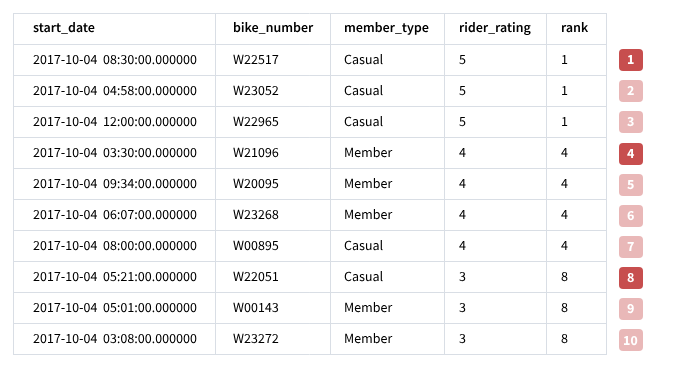

The illustration above explains how the `RANK()` function operates and highlights the difference between it and the `ROW_NUMBER()` function. Note that the numbers enclosed in red squares represent row numbers.

To better understand how the `RANK()` function works, look at the result of the above query. The rank of each trip is given in the last column.
There are three trips with the highest rating, 5, and they all are ranked 1. But surprisingly, the fourth row with a rating of 4 is ranked 4, not 2.

Since there are three trips with the same rating values before the fourth row, even though the first three rows are all ranked one, the rank stays the same until the value of `rider_rating` changes and the rank becomes the row number.

The `RANK()` function assigns the same rank to the rows with equal values in the ORDER BY column. Also, the next rank is calculated by adding the number of tied rows to the tied rank; thus, the **ranks might not be consecutive**.

Let’s include `PARTITION BY` in our next query to discover each trip’s rank when the rows are divided into two partitions based on the available member types.

```sql
SELECT start_date, bike_number, member_type, rider_rating,
       RANK() OVER(
           PARTITION BY member_type
           ORDER BY rider_rating DESC)
  FROM trips;
```

| start_date                 | bike_number | member_type | rider_rating | rank |
|----------------------------|-------------|-------------|--------------|------|
| 2017-10-03 12:00:00.000000 | W22965      | Casual      | 5            | 1    |
| 2017-10-04 04:58:00.000000 | W23052      | Casual      | 5            | 1    |
| 2017-10-04 08:30:00.000000 | W22517      | Casual      | 5            | 1    |
| 2017-10-05 08:08:00.000000 | W00895      | Casual      | 4            | 4    |
| 2017-10-04 05:21:00.000000 | W22051      | Casual      | 3            | 5    |
| 2017-10-02 03:30:00.000000 | W21096      | Member      | 4            | 1    |
| 2017-10-03 09:34:00.000000 | W20095      | Member      | 4            | 1    |
| 2017-10-04 06:07:00.000000 | W23268      | Member      | 4            | 1    |
| 2017-10-05 08:08:00.000000 | W20184      | Member      | 3            | 4    |
| 2017-10-01 03:08:00.000000 | W23272      | Member      | 3            | 4    |
| 2017-10-01 05:01:00.000000 | W00143      | Member      | 3            | 4    |
| 2017-10-01 05:01:00.000000 | W23254      | Member      | 2            | 7    |

Looking at the results, we can see that the rankings are reset to 1 once the value of `member_type` changes.

## Instructions

Write a query against the `trips` table that ranks each day’s trips based on their durations.

1. Select all the table’s columns.

1. Use the `RANK()` function to determine the rank of each trip.

    * Use the `EXTRACT()` function to extract day from the `start_date` column.

    * Sort the duration column so that the longest trip receives a rank of 1.

In [ ]:
%%sql
SELECT *,
       RANK() OVER(PARTITION BY EXTRACT(DAY FROM start_date)
                    ORDER by duration DESC)
  FROM trips 

# 5) The DENSE_RANK() Function

This section will teach the other helpful ranking function, `DENSE_RANK()`. It returns the same ranking for the identical values of a column specified in the ORDER BY subclause.

Unlike the `RANK()` function, the `DENSE_RANK()` function **doesn’t leave gaps in numbering** when more than one identical value is in the ORDER BY column.

In other words, by changing the value of the `ORDER BY` column:

* the `RANK()` function returns how many rows are before the current row,

* the `DENSE_RANK()` returns how many unique values are before the current value.

The syntax for the `DENSE_RANK()` function is:

```sql
DENSE_RANK() OVER (
 [PARTITION BY expression,...]
 ORDER BY expression,...
)
```

Let’s discover the `DENSE_RANK()` function by ranking trips based on the `rider_rating` column.

```sql
SELECT start_date, bike_number, member_type, rider_rating,
       DENSE_RANK() OVER(
                    ORDER BY rider_rating DESC)
  FROM trips;
```

| start_date                 | bike_number | member_type | rider_rating | dense_rank |
|----------------------------|-------------|-------------|--------------|------------|
| 2017-10-04 08:30:00.000000 | W22517      | Casual      | 5            | 1          |
| 2017-10-04 04:58:00.000000 | W23052      | Casual      | 5            | 1          |
| 2017-10-03 12:00:00.000000 | W22965      | Casual      | 5            | 1          |
| 2017-10-02 03:30:00.000000 | W21096      | Member      | 4            | 2          |
| 2017-10-03 09:34:00.000000 | W20095      | Member      | 4            | 2          |
| 2017-10-04 06:07:00.000000 | W23268      | Member      | 4            | 2          |
| 2017-10-05 08:08:00.000000 | W00895      | Casual      | 4            | 2          |
| 2017-10-04 05:21:00.000000 | W22051      | Casual      | 3            | 3          |
| 2017-10-01 05:01:00.000000 | W00143      | Member      | 3            | 3          |
| 2017-10-01 03:08:00.000000 | W23272      | Member      | 3            | 3          |
| 2017-10-05 08:08:00.000000 | W20184      | Member      | 3            | 3          |
| 2017-10-01 05:01:00.000000 | W23254      | Member      | 2            | 4          |

As we’ve seen, the first three rows receive a ranking of 1, and the fourth row receives a ranking of 2. The `DENSE_RANK()` function returns dense ranks, meaning numbering gaps occur.



## Instructions

Assume your manager wants you to identify the longest bike trips for each day. Write a query against the `trips` table.

1. Select all the table’s columns.

1. Use the `DENSE_RANK()` function to rank each day’s trips based on duration.

    * Use the `EXTRACT()` function to extract day from the start_date column.
    
    * Sort the `duration` column so the longest trip receives a rank of 1.
    
    * Alias your window function as `trip_dense_rank`.

1. Keep the rows with a dense rank of 1. Consider using a CTE to make filtering rows with a dense rank of 1 more straightforward.

In [ ]:
%%sql
WITH
filter_1 AS (SELECT *,
             DENSE_RANK() OVER(PARTITION BY EXTRACT(DAY from start_date)                  ORDER BY duration DESC) AS trip_dense_rank
          FROM trips) --primeiro extrai toda a tabela

SELECT *
FROM filter_1       
WHERE trip_dense_rank = 1 --depois filtra apenas os primeiros colocados por dia

# 6) Comparing The Three Ranking Window Functions

Let's deepen our understanding of the three ranking window functions by trying the following query. 

**The query below returns the values of the three ranking functions we've learned so far**, so we can compare how they rank values.

```sql
SELECT start_date,bike_number, member_type, rider_rating,
       ROW_NUMBER() OVER(ORDER BY rider_rating DESC),
       RANK() OVER(ORDER BY rider_rating DESC),
       DENSE_RANK() OVER(ORDER BY rider_rating DESC)
  FROM trips;
```

| start_date                 | bike_number | member_type | rider_rating | row_number | rank | dense_rank |
|----------------------------|-------------|-------------|--------------|------------|------|------------|
| 2017-10-04 08:30:00.000000 | W22517      | Casual      | 5            | 1          | 1    | 1          |
| 2017-10-04 04:58:00.000000 | W23052      | Casual      | 5            | 2          | 1    | 1          |
| 2017-10-03 12:00:00.000000 | W22965      | Casual      | 5            | 3          | 1    | 1          |
| 2017-10-02 03:30:00.000000 | W21096      | Member      | 4            | 4          | 4    | 2          |
| 2017-10-03 09:34:00.000000 | W20095      | Member      | 4            | 5          | 4    | 2          |
| 2017-10-04 06:07:00.000000 | W23268      | Member      | 4            | 6          | 4    | 2          |
| 2017-10-05 08:08:00.000000 | W00895      | Casual      | 4            | 7          | 4    | 2          |
| 2017-10-04 05:21:00.000000 | W22051      | Casual      | 3            | 8          | 8    | 3          |
| 2017-10-01 05:01:00.000000 | W00143      | Member      | 3            | 9          | 8    | 3          |
| 2017-10-01 03:08:00.000000 | W23272      | Member      | 3            | 10         | 8    | 3          |
| 2017-10-05 08:08:00.000000 | W20184      | Member      | 3            | 11         | 8    | 3          |
| 2017-10-01 05:01:00.000000 | W23254      | Member      | 2            | 12         | 12   | 4          |

Notice that the `rider_rating` column is not unique, which affects the output of our three ranking functions differently, and the ordering direction is descending. The result set above shows that the row numbers are unique. However, the rank and dense rank values are not unique.

All the rows with the **same rider rating get the same rank and dense rank**.

For example, for all rows with rider rating 4, the rank and dense rank values are the same, 4 and 2, respectively. 

* Rank 4 means there are three rows with higher rider ratings in the result set, 

* Dense rank 2 means one greater distinct rider rating exists in the result set.

# 7) The NTILE() Function

The `NTILE()` function is mainly used for analytical purposes and divides ordered rows into roughly equally-sized buckets based on a specified window ordering.

The `NTILE()` can be used to segment customers or products into different groups based on a specific attribute or behavior. For example, if we have a dataset of customers and their purchase history, we can use `NTILE()` to divide them into segments based on the total amount they have spent.

The syntax for the `NTILE()` function is:

```sql
NTILE(ntile_expression) 
OVER(
    [PARTITION BY expression,...]
    ORDER BY expression,...
)
```

The `NTILE()` function returns an integer indicating a specific row’s bucket number. The `ntile_expression` part specifies the number of buckets, and the numbering starts at 1.

The size of each bucket created by the `NTILE()` function is as equal to the other buckets as possible.

The `NTILE()` function requires the ORDER BY subclause, and the PARTITION BY subclause is optional.

Let’s see how the `NTILE()` ranking function works. Suppose we are asked to create **five buckets** and assign each trip based on **duration** to one of them.

```sql
SELECT start_date,bike_number, duration, rider_rating,
       NTILE(5) OVER(ORDER BY duration DESC)
  FROM trips;
```

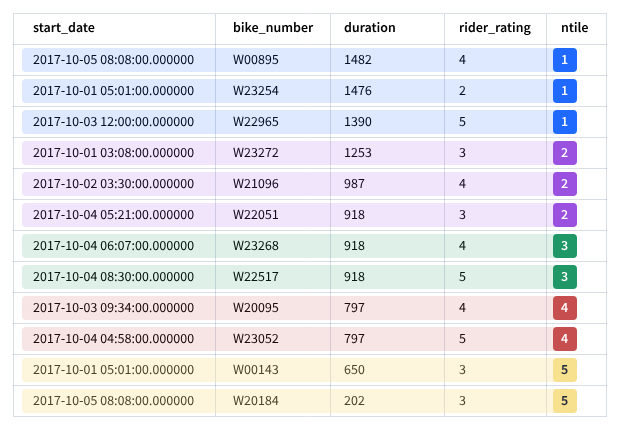

We've created five buckets based on the duration column's values in the query above. In other words, the `NTILE()` function distributes the trips into five buckets. Since the rows are sorted in descending order, the longest trips have been put in bucket 1 and the shortest in bucket 5.

The size of each bucket created by the `NTILE()` function is as equal to the other buckets as possible. That means if the number of rows is not divisible by the number of buckets specified in the `NTILE()` function, some buckets get one more row than others.

## Instructions

The bike-sharing company prioritizes maintenance for bikes with the highest daily rider ratings to enhance customer satisfaction. Your task is to identify these top-rated bikes by writing a query that divides each day's trips into two buckets based on rider ratings — placing the highest-rated bikes in the first bucket and the lowest-rated bikes in the second bucket. This data will help the company maintain its best-performing bikes in optimal condition.

1. Select the `start_date`, `bike_number`, and `rider_rating` columns from the `trips` table.

1. Use the `NTILE()` function to divide each day’s trip into two buckets based on rider ratings.

1. Use the `EXTRACT()` function to extract day from the start_date column.

1. Order the data by `rider_rating` in descending order within the `OVER()` clause to place higher-rated trips in the first bucket and lower-rated trips in the second bucket.

In [ ]:
%%sql
SELECT start_date, bike_number, rider_rating,
       NTILE(2) OVER(PARTITION BY EXTRACT(DAY FROM start_date) -divides os dados em 2 grupos
                     ORDER BY rider_rating DESC) --coloca as melhores notas no grupo 1 e as piores no grupo 2
FROM trips

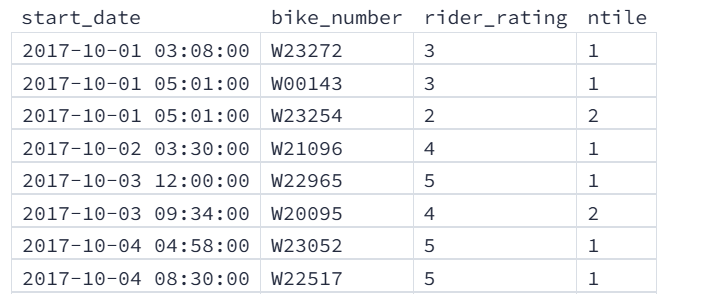

# 8) Solving Real-World Problems with Window Ranking Functions

In this section, we’ll learn three applications of the ranking functions for solving real-world problems.

## First Scenario

Suppose we're curious about the **longest trips of every day**. Using traditional SQL statements to answer this question is possible, but not as easy as the solution we’re discussing right now.

```sql
WITH longtrips AS
    (
        SELECT *,
        ROW_NUMBER() OVER(PARTITION BY EXTRACT(DAY FROM start_date)
         ORDER BY duration DESC) AS RowNumber
          FROM trips
    )
SELECT *
  FROM longtrips
 WHERE RowNumber = 1;
```
| start_date                 | end_date                   | duration | start_station_n | start_station     | end_station_n | end_station                              | bike_n | member_type | rider_rt | row_n |
|----------------------------|----------------------------|----------|----------------------|-------------------|--------------------|------------------------------------------|-------------|-------------|--------------|-----------|
| 2017-10-01 05:01:00.000000 | 2017-10-01 05:26:00.000000 | 1476     | 31002                | 20th & Crystal Dr | 31010              | S Glebe & Potomac Ave                    | W23254      | Member      | 2            | 1         |
| 2017-10-02 03:30:00.000000 | 2017-10-02 03:47:00.000000 | 987      | 31002                | 20th & Crystal Dr | 31249              | Jefferson Memorial                       | W21096      | Member      | 4            | 1         |
| 2017-10-03 12:00:00.000000 | 2017-10-03 12:23:00.000000 | 1390     | 31002                | 20th & Crystal Dr | 31247              | Jefferson Dr & 14th St SW                | W22965      | Casual      | 5            | 1         |
| 2017-10-04 08:30:00.000000 | 2017-10-04 08:45:00.000000 | 918      | 31002                | 20th & Crystal Dr | 31235              | 19th St & Constitution Ave NW            | W22517      | Casual      | 5            | 1         |
| 2017-10-05 08:08:00.000000 | 2017-10-05 08:33:00.000000 | 1482     | 31002                | 20th & Crystal Dr | 31633              | Independence Ave & L'Enfant Plaza SW/DOE | W00895      | Casual      | 4            | 1         |

We've solved the problem using a CTE containing all the columns plus a row number. 

The row number is partitioned by day, so the numbers start over for each day. **The outer query retrieves the data from the CTE and filters on the row number**.

## Second Senario

The second scenario highlights applying the `DENSE_RANK()` function to return each day’s **second-most-rated trip**.

```sql
WITH rating AS
    (
        SELECT start_date, duration, bike_number, rider_rating,
        DENSE_RANK() OVER(PARTITION BY EXTRACT(DAY FROM start_date)
        ORDER BY rider_rating DESC) AS rank
        FROM trips
    )
SELECT *
  FROM rating
 WHERE rank = 2;
```

| start_date                 | duration | bike_number | rider_rating | rank |
|----------------------------|----------|-------------|--------------|------|
| 2017-10-01 05:01:00.000000 | 1476     | W23254      | 2            | 2    |
| 2017-10-03 09:34:00.000000 | 797      | W20095      | 4            | 2    |
| 2017-10-04 06:07:00.000000 | 918      | W23268      | 4            | 2    |
| 2017-10-05 08:08:00.000000 | 202      | W20184      | 3            | 2    |

The query above consists of two parts.

1.  The CTE contains the `start_date`, `duration`, `bike_number`, and `rider_rating` columns, plus the rank of each trip, which is calculated by the `dense_rank()` function. The trips are partitioned by day, so the ranks start over for each day. 

1. Finally, the outer query returns trips with rank `2`.



## Instructions

Let's help the bike-sharing company distribute bonus money to its riders based on their ride duration. The company's management has defined **four bonus pools**, with riders in the first pool receiving a **USD 5** bonus and riders in the last pool receiving a **USD 2** bonus.

Write a SQL query against the trips table to calculate the bonus for each rider and display the results.

1. Select the `start_date`, `bike_number`, `member_type`, and `duration` columns.

1. Use the `NTILE()` window function to divide the riders into four groups based on their ride duration. Order the data by duration in the OVER() clause.

1. Add 1 to the result of the `NTILE()` function to calculate the bonus for each rider, with the first group receiving a USD 5 bonus and the last group receiving a USD 2 bonus. Alias this column as `bonus`.

1. Order the final result set by the bonus amount in descending order to display the riders with the largest bonus at the top.

In [ ]:
%%sql
SELECT start_date, bike_number, member_type, duration,
       NTILE(4) OVER(ORDER BY duration) +1 AS bonus
FROM trips
ORDER BY bonus DESC
